In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
resultdir = 'output/'
def plot2(df, x, y, style, pal_num, hue = None,label = "", savename = ""):
    pal = sns.color_palette("cubehelix", pal_num)
    sns.set_style("darkgrid")
    
    fig = sns.lineplot(x, y , data=df, palette=pal, hue=hue, style = style)
    plt.title(label)
    fp = resultdir + savename
    plt.savefig(fp)
    plt.show()
    plt.close()

import os
import pickle
def getresult(fn):
    f = open(os.path.join(resultdir, fn), "rb")
    return pickle.load(f, encoding='latin1')

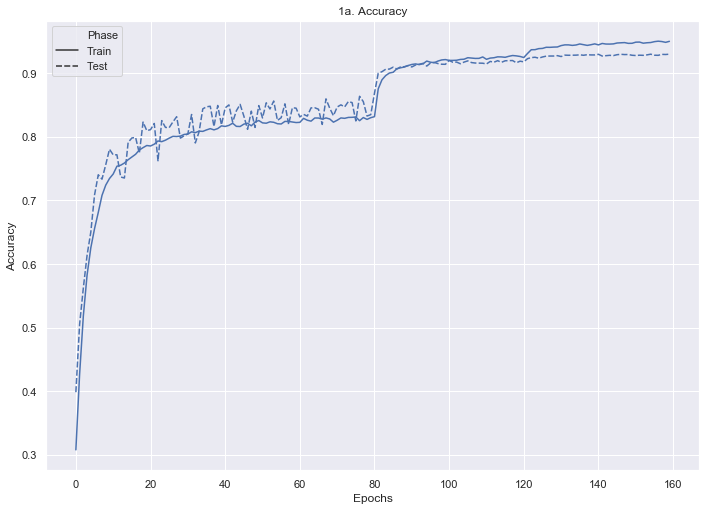

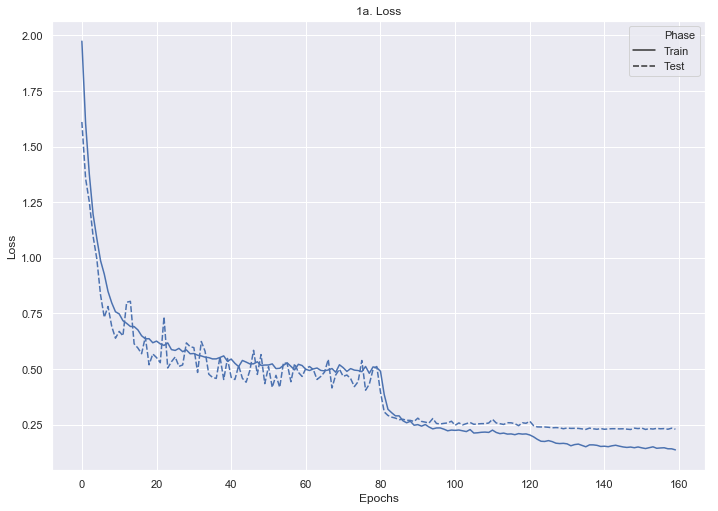

In [14]:
import pandas as pd
import numpy as np

nepochs = 160
filename = "9299exp_SSResNet20_start_epoch_0_epochs_160.pk"
ra = getresult(filename)

dfe = pd.DataFrame()
dfs = pd.DataFrame()

df1 = pd.DataFrame({"Accuracy":ra['train_acc'],"Phase":'Train' ,"Epochs":list(range(nepochs))})
df2 = pd.DataFrame({"Accuracy":ra['val_acc'], "Phase":'Test' ,"Epochs":list(range(nepochs))})
df3 = pd.DataFrame({"Loss":ra['train_loss'],"Phase":'Train' ,"Epochs":list(range(nepochs))})
df4 = pd.DataFrame({"Loss":ra['val_loss'], "Phase":'Test' ,"Epochs":list(range(nepochs))})

dfe = pd.concat([dfe, df1, df2])
dfs = pd.concat([dfs, df3, df4])
    
plot2(dfe, "Epochs", "Accuracy",  style="Phase", pal_num=1, label="1a. Accuracy", savename="ss_default_acc")
plot2(dfs, "Epochs", "Loss", style="Phase", pal_num=1, label="1a. Loss", savename="ss_default_loss")

In [ ]:
sns.